## Assignment 1 notebook

### Task 1.1 (word count example)
Created an instance based on the “​ Hadoop-Lab2-volume-final-snapshot​ ” snapshot. Connected using commands ```chmod 700 ldsa.pem``` and ```ssh -i ldsa.pem ubuntu@129.16.122.22```. 
Added hostname 'haol-a1' to etc/hosts.
Downloaded input data using command ```wget http://www.gutenberg.org/ebooks/20417.txt.utf-8```
Executed command ```/usr/local/hadoop/bin/hadoop jar /usr/local/hadoop/share/hadoop/mapreduce/hadoop*examples*.jar wordcount input output```


#### Questions:
 - Look at the contents of the folder “output” - what are the files place in there? What do they mean?
 
There are two files called _SUCCESS and part-r-00000. _SUCCESS is empty but the fact that it has been created menas the operation was completed successfully. part-r-00000 contains the result of the reudction; all the words and how many of them appear.
 
  - In this example we used Hadoop in “​ Local (Standalone) Mode​ ”. What is the difference between this mode and the Pseudo-distributed mode?
  
The difference between Local (Standalone) mode and Pseudo-distributed mode is that in standalone mode hadoop runs as a single Java process without any daemons. In this case HDFS is not used.
Pseudo-distributed mode means that a small scale cluster is simulated, running daemons on the local machine and using HDFS.

### Task 1.2
Setup hadoop as pseudo-distributed by going to '/usr/local/hadoop/etc/hadoop/core-site.xml' and adding:
```
<configuration>
    <property>
        <name>fs.defaultFS</name>
        <value>hdfs://localhost:9000</value>
    </property>
</configuration>
```

and to '/usr/local/hadoop/etc/hadoop/hdfs-site.xml': 
```
<configuration>
    <property>
        <name>dfs.replication</name>
        <value>1</value>
    </property>
</configuration>
```
These three commands were executed in order to get passphraseless connection to localhost ssh:

  ```$ ssh-keygen -t rsa -P '' -f ~/.ssh/id_rsa ```
  
  ```$ cat ~/.ssh/id_rsa.pub >> ~/.ssh/authorized_keys```
  
  ```$ chmod 0600 ~/.ssh/authorized_keys```
  
System was formatted using command 
```$ bin/hdfs namenode -format```
NameNode and DataNode daemons were started by executing command 
```$ sbin/start-dfs.sh```

```$ jps``` gave out:

16912 SecondaryNameNode

17026 Jps

16642 NameNode

16756 DataNode

so everything seemed to be in order.

#### Questions: 
 - What are the roles of the files core-site.xml and hdfs-site.xml ?
The role of core-site.xml is for any site-specific property overrides that the user might want to define. In our example we defined where in the cluster namenode should run.
Hdfs-site.xml contains the configuration settings for the hdfs daemons (NameNode, Secondary NameNode and the DataNodes). 

 - Describe briefly the roles of the different services listed when executing ‘jps’.

 

### Task 1.3
Compiled the wordcount example and made a jar-file by executing commands:

```$ cd /home/ubuntu/wordcount```

```$ javac -cp `/usr/local/hadoop/bin/hadoop classpath` WordCount.java```

```$ jar -cvf wordcount.jar *.cla```

Ran the hadoop code using command:

```$ /usr/local/hadoop/bin/hadoop jar wordcount.jar WordCount input output2```

Ran command:

```$ /usr/local/hadoop/bin/hdfs dfs -ls output2```

It showed the two files '_SUCCESS' and 'part-00000'

The command:

```$ /usr/local/hadoop/bin/hdfs dfs -ls output2/part-00000```

showed the contents of the result files, all semmes to have worked fine.

#### Questions:
 - Explain the roles of the different classes in the file WordCount.java.
The two classes in WordCount.java is Map and Reduce. Map takes the input and creates a set of intermediate key-value pairs. The role of Reduce is to take these intermediate key-value pairs and reduce the set. This is done by combining the same keys and adding their value so that the set consists of fewer key-value pairs.

### Task 1.4

The existing WordCount example was modified to count the characters at the beginning of the words instead. 

The result of this is seen underneath.

#### Questions:
 - Describe the role of Combiners in MapReduce.
The role of Combiners is to reduce the size of the data that is transferred between Map and Reduce. This is done by summarizing the output from Map that has the same key.
 
#### Plot:

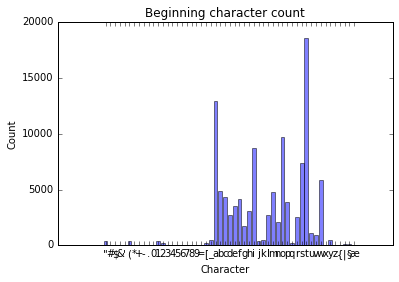

In [38]:
import numpy as np
import matplotlib.pyplot as plt

with open("./wordcount/part-00000") as f:
    lines = f.readlines()
    character = [line.split()[0] for line in lines]
    y = [int(line.split()[1]) for line in lines]
    
x = np.arange(len(y))
    
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, character)
plt.xlabel("Character")
plt.ylabel("Count")
plt.title("Beginning character count")
    
plt.show()

## Part II: Analyzing twitter data using Hadoop streaming and Python

Using the provided tutorial as a basis python code was written to parse the tweets and find occurances of the words "han", "hon", "den", "det", "denna", "denne" and "hen". The occurance of these were counted and plotted (ignoring retweets).

#### Question:
 - Based on the documentation in the above link, how would you classify the JSON-formatted tweets? Structured, semi-structured or unstructured data? What could be the challenges of using traditional row-based RDBMs to store and analyze this dataset (apart from the possibility of very large datasets)?
 
I would classify JSON-formatted tweets as structured data. One challenge in using traditional row-based RDBMs could be that it takes some extra work to get the information out of the JSON format. This might not be an íssue when working with small data sets but might make it unusable if the dataset gets bigger.  

#### Plot:

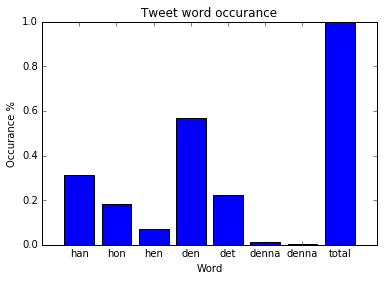

In [13]:
import numpy as np
import matplotlib.pyplot as plt

with open("./part2/tweet_result.txt") as f:
    lines = f.readlines()
    word = [line.split()[0] for line in lines]
    count = [int(line.split()[1]) for line in lines]
    
total = count[7]
x = np.arange(len(word))
y = [count[0]/total, count[1]/total, count[2]/total, count[3]/total, count[4]/total, count[5]/total, count[6]/total, count[7]/total]
    
plt.bar(x, y, align='center')
plt.xticks(x, word)
plt.xlabel("Word")
plt.ylabel("Occurance %")
plt.title("Tweet word occurance")
    
plt.show()